by Kiprono Kikwai Leonard

**Data Description**

"On November 24, 2008, the SEC found Prosper to be in violation of the Securities Act of 1933. As a result of these findings, the SEC imposed a cease and desist order on Prosper ... In July 2009, Prosper reopened their website for lending ("investing") and borrowing after having obtained SEC registration for its loans ("notes"). After the relaunch, bidding on loans was restricted to residents of 28 U.S. states and the District of Columbia. Borrowers may reside in any of 47 states, with residents of three states (Iowa, Maine, and North Dakota) not permitted to borrow through Prosper".

In [2]:
#import necessary packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
%matplotlib inline

In [3]:
#load in the dataset and read it into pandas dataframe
df=pd.read_csv('prosperLoanData.csv')

In [4]:
#Over-view of data 
df.head()

,ListingKey,ListingNumber,ListingCreationDate,CreditGrade,Term,LoanStatus,ClosedDate,BorrowerAPR,BorrowerRate,LenderYield,...,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
0,1021339766868145413AB3B,193129,2007-08-26 19:09:29.263000000,C,36,Completed,2009-08-14 00:00:00,0.16516,0.1580,0.1380,...,-133.18,0.0,0.0,0.0,0.0,1.0,0,0,0.0,258
1,10273602499503308B223C1,1209647,2014-02-27 08:28:07.900000000,NaN,36,Current,NaN,0.12016,0.0920,0.0820,...,0.00,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1
2,0EE9337825851032864889A,81716,2007-01-05 15:00:47.090000000,HR,36,Completed,2009-12-17 00:00:00,0.28269,0.2750,0.2400,...,-24.20,0.0,0.0,0.0,0.0,1.0,0,0,0.0,41
3,0EF5356002482715299901A,658116,2012-10-22 11:02:35.010000000,NaN,36,Current,NaN,0.12528,0.0974,0.0874,...,-108.01,0.0,0.0,0.0,0.0,1.0,0,0,0.0,158
4,0F023589499656230C5E3E2,909464,2013-09-14 18:38:39.097000000,NaN,36,Current,NaN,0.24614,0.2085,0.1985,...,-60.27,0.0,0.0,0.0,0.0,1.0,0,0,0.0,20


In [4]:
#dataframe shape
df.shape

(113937, 81)

In [5]:
#overview of 69-va6riables dtypes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113937 entries, 0 to 113936
Data columns (total 81 columns):
 #   Column                               Non-Null Count   Dtype  
---  ------                               --------------   -----  
 0   ListingKey                           113937 non-null  object 
 1   ListingNumber                        113937 non-null  int64  
 2   ListingCreationDate                  113937 non-null  object 
 3   CreditGrade                          28953 non-null   object 
 4   Term                                 113937 non-null  int64  
 5   LoanStatus                           113937 non-null  object 
 6   ClosedDate                           55089 non-null   object 
 7   BorrowerAPR                          113912 non-null  float64
 8   BorrowerRate                         113937 non-null  float64
 9   LenderYield                          113937 non-null  float64
 10  EstimatedEffectiveYield              84853 non-null   float64
 11  EstimatedLoss

In [6]:
df.CreditScoreRangeLower.value_counts()

680.0    16492
660.0    16366
700.0    15471
720.0    12923
640.0    12199
740.0     9267
760.0     6606
780.0     4624
620.0     4172
600.0     3602
800.0     2644
520.0     1593
540.0     1474
820.0     1409
560.0     1357
580.0     1125
840.0      567
500.0      554
480.0      346
860.0      212
460.0      141
0.0        133
440.0       36
880.0       27
420.0        5
360.0        1
Name: CreditScoreRangeLower, dtype: int64

In [6]:
# Intervals and levels
bins=[300,500,600,700,df['CreditScoreRangeLower'].max()]
labels=['Poor','Fair','Good','Very Good']

#create new variable using .cut()
df['CreditScore']=pd.cut(df['CreditScoreRangeLower'],bins,labels=labels,right=False,include_lowest=True)

In [7]:
df['CreditScore'].value_counts()

Very Good    53723
Good         52831
Fair          6103
Poor           529
Name: CreditScore, dtype: int64

In [8]:
#try slicing creditscore observation
df.loc[df['CreditScore']=='Fair']

,ListingKey,ListingNumber,ListingCreationDate,CreditGrade,Term,LoanStatus,ClosedDate,BorrowerAPR,BorrowerRate,LenderYield,...,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors,CreditScore
42,10AD33803102786533722BB,93263,2007-02-04 17:24:27.850000000,HR,36,Chargedoff,2008-08-08 00:00:00,0.30300,0.2900,0.2850,...,0.00,1096.92,1096.92,0.0,1.0,0,0,0.0,15,Fair
68,0F2F338417457873000F9A3,111744,2007-03-15 21:00:17.840000000,E,36,Completed,2010-03-17 00:00:00,0.21554,0.1970,0.1670,...,0.00,0.00,0.00,0.0,1.0,0,0,0.0,23,Fair
76,0DFD336490760860963B515,24177,2006-07-11 20:48:47.660000000,E,36,Completed,2007-08-10 00:00:00,0.25861,0.2500,0.2450,...,0.00,0.00,0.00,0.0,1.0,0,0,0.0,38,Fair
101,0F6A3407615179140F880BF,254944,2007-12-23 12:09:24,E,36,Chargedoff,2010-03-10 00:00:00,0.20421,0.1895,0.1795,...,0.00,1465.36,1465.36,0.0,1.0,1,0,0.0,91,Fair
113,10CB3381860531415ABCC0F,102723,2007-02-23 01:40:19.853000000,HR,36,Completed,2010-02-28 00:00:00,0.30564,0.2900,0.2800,...,-90.58,0.00,0.00,0.0,1.0,1,0,0.0,39,Fair
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113872,D1C634013964207595BB979,208897,2007-09-30 12:00:41.010000000,HR,36,Completed,2009-01-20 00:00:00,0.30503,0.2894,0.2794,...,0.00,0.00,0.00,0.0,1.0,1,0,0.0,31,Fair
113891,E30E3385157595321467881,119186,2007-04-04 18:33:17.170000000,E,36,Completed,2010-04-20 00:00:00,0.19543,0.1808,0.1708,...,0.00,0.00,0.00,0.0,1.0,0,0,0.0,133,Fair
113896,E6A53412522524762F41C95,275772,2008-02-04 15:05:16.950000000,HR,36,Chargedoff,2008-09-13 00:00:00,0.32327,0.2995,0.2895,...,0.00,2120.61,2120.61,0.0,1.0,0,0,0.0,28,Fair
113914,D20533652658825353F6597,30223,2006-08-09 14:34:40.010000000,HR,36,Defaulted,2007-03-19 00:00:00,0.25757,0.2500,0.2450,...,0.00,2883.01,2883.00,0.0,1.0,0,0,0.0,1,Fair


In [9]:
#drop CreditScoreRangeLower and CreditScoreRangeUpper
col=['CreditScoreRangeLower','CreditScoreRangeUpper']

df.drop(columns=col,axis=1,inplace=True)

In [10]:
#sort CreditScore
score=['Poor','Fair','Good','Very Good']
ordered_score=pd.api.types.CategoricalDtype(ordered=True,categories=score)
df['CreditScore']=df['CreditScore'].astype(ordered_score)

In [12]:
loan=['ListingKey','ListingCreationDate','CreditScore','Term','LoanStatus','ClosedDate','BorrowerAPR','BorrowerRate',
      'ProsperRating(numeric)','ProsperRating (Alpha)','ProsperScore','ListingCategory (numeric)','BorrowerState',
     'Occupation','EmploymentStatus','EmploymentStatusDuration','IsBorrowerHomeowner','DebtToIncomeRatio','IncomeRange',
      'IncomeVerifiable','LoanCurrentDaysDelinquent','LoanMonthsSinceOrigination','LoanOriginalAmount','LoanOriginationDate']

In [11]:
#locate the necessary columns important for our analysis
df_loan=df.loc[:,('ListingKey','ListingCreationDate','CreditScore','Term','LoanStatus','ClosedDate','BorrowerAPR','BorrowerRate',
      'ProsperRating (numeric)','ProsperRating (Alpha)','ProsperScore','ListingCategory (numeric)','BorrowerState',
     'Occupation','EmploymentStatus','EmploymentStatusDuration','IsBorrowerHomeowner','DebtToIncomeRatio','IncomeRange',
    'IncomeVerifiable','StatedMonthlyIncome','LoanCurrentDaysDelinquent','LoanMonthsSinceOrigination','LoanOriginalAmount',
    'LoanOriginationDate')]

In [12]:
df_loan.head()

,ListingKey,ListingCreationDate,CreditScore,Term,LoanStatus,ClosedDate,BorrowerAPR,BorrowerRate,ProsperRating (numeric),ProsperRating (Alpha),...,EmploymentStatusDuration,IsBorrowerHomeowner,DebtToIncomeRatio,IncomeRange,IncomeVerifiable,StatedMonthlyIncome,LoanCurrentDaysDelinquent,LoanMonthsSinceOrigination,LoanOriginalAmount,LoanOriginationDate
0,1021339766868145413AB3B,2007-08-26 19:09:29.263000000,Good,36,Completed,2009-08-14 00:00:00,0.16516,0.1580,NaN,NaN,...,2.0,True,0.17,"$25,000-49,999",True,3083.333333,0,78,9425,2007-09-12 00:00:00
1,10273602499503308B223C1,2014-02-27 08:28:07.900000000,Good,36,Current,NaN,0.12016,0.0920,6.0,A,...,44.0,False,0.18,"$50,000-74,999",True,6125.000000,0,0,10000,2014-03-03 00:00:00
2,0EE9337825851032864889A,2007-01-05 15:00:47.090000000,Poor,36,Completed,2009-12-17 00:00:00,0.28269,0.2750,NaN,NaN,...,NaN,False,0.06,Not displayed,True,2083.333333,0,86,3001,2007-01-17 00:00:00
3,0EF5356002482715299901A,2012-10-22 11:02:35.010000000,Very Good,36,Current,NaN,0.12528,0.0974,6.0,A,...,113.0,True,0.15,"$25,000-49,999",True,2875.000000,0,16,10000,2012-11-01 00:00:00
4,0F023589499656230C5E3E2,2013-09-14 18:38:39.097000000,Good,36,Current,NaN,0.24614,0.2085,3.0,D,...,44.0,True,0.26,"$100,000+",True,9583.333333,0,6,15000,2013-09-20 00:00:00


In [15]:
df_loan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113937 entries, 0 to 113936
Data columns (total 25 columns):
 #   Column                      Non-Null Count   Dtype   
---  ------                      --------------   -----   
 0   ListingKey                  113937 non-null  object  
 1   ListingCreationDate         113937 non-null  object  
 2   CreditScore                 113213 non-null  category
 3   Term                        113937 non-null  int64   
 4   LoanStatus                  113937 non-null  object  
 5   ClosedDate                  55089 non-null   object  
 6   BorrowerAPR                 113912 non-null  float64 
 7   BorrowerRate                113937 non-null  float64 
 8   ProsperRating (numeric)     84853 non-null   float64 
 9   ProsperRating (Alpha)       84853 non-null   object  
 10  ProsperScore                84853 non-null   float64 
 11  ListingCategory (numeric)   113937 non-null  int64   
 12  BorrowerState               108422 non-null  object  
 13 

In [16]:
df_loan.duplicated().sum()

0

In [17]:
df_loan.isnull().sum()

ListingKey                        0
ListingCreationDate               0
CreditScore                     724
Term                              0
LoanStatus                        0
ClosedDate                    58848
BorrowerAPR                      25
BorrowerRate                      0
ProsperRating (numeric)       29084
ProsperRating (Alpha)         29084
ProsperScore                  29084
ListingCategory (numeric)         0
BorrowerState                  5515
Occupation                     3588
EmploymentStatus               2255
EmploymentStatusDuration       7625
IsBorrowerHomeowner               0
DebtToIncomeRatio              8554
IncomeRange                       0
IncomeVerifiable                  0
StatedMonthlyIncome               0
LoanCurrentDaysDelinquent         0
LoanMonthsSinceOrigination        0
LoanOriginalAmount                0
LoanOriginationDate               0
dtype: int64

In [18]:
df_loan.describe()

,Term,BorrowerAPR,BorrowerRate,ProsperRating (numeric),ProsperScore,ListingCategory (numeric),EmploymentStatusDuration,DebtToIncomeRatio,StatedMonthlyIncome,LoanCurrentDaysDelinquent,LoanMonthsSinceOrigination,LoanOriginalAmount
count,113937.000000,113912.000000,113937.000000,84853.000000,84853.000000,113937.000000,106312.000000,105383.000000,1.139370e+05,113937.000000,113937.000000,113937.00000
mean,40.830248,0.218828,0.192764,4.072243,5.950067,2.774209,96.071582,0.275947,5.608026e+03,152.816539,31.896882,8337.01385
std,10.436212,0.080364,0.074818,1.673227,2.376501,3.996797,94.480605,0.551759,7.478497e+03,466.320254,29.974184,6245.80058
min,12.000000,0.006530,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,1000.00000
25%,36.000000,0.156290,0.134000,3.000000,4.000000,1.000000,26.000000,0.140000,3.200333e+03,0.000000,6.000000,4000.00000
50%,36.000000,0.209760,0.184000,4.000000,6.000000,1.000000,67.000000,0.220000,4.666667e+03,0.000000,21.000000,6500.00000
75%,36.000000,0.283810,0.250000,5.000000,8.000000,3.000000,137.000000,0.320000,6.825000e+03,0.000000,65.000000,12000.00000
max,60.000000,0.512290,0.497500,7.000000,11.000000,20.000000,755.000000,10.010000,1.750003e+06,2704.000000,100.000000,35000.00000


In [13]:
# change time variables to desired dtype
df_loan['ListingCreationDate']=pd.to_datetime(df_loan['ListingCreationDate'])
df_loan['ClosedDate']=pd.to_datetime(df_loan['ClosedDate'])
df_loan['LoanOriginationDate']=pd.to_datetime(df_loan['LoanOriginationDate'])

In [20]:
df_loan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113937 entries, 0 to 113936
Data columns (total 25 columns):
 #   Column                      Non-Null Count   Dtype         
---  ------                      --------------   -----         
 0   ListingKey                  113937 non-null  object        
 1   ListingCreationDate         113937 non-null  datetime64[ns]
 2   CreditScore                 113213 non-null  category      
 3   Term                        113937 non-null  int64         
 4   LoanStatus                  113937 non-null  object        
 5   ClosedDate                  55089 non-null   datetime64[ns]
 6   BorrowerAPR                 113912 non-null  float64       
 7   BorrowerRate                113937 non-null  float64       
 8   ProsperRating (numeric)     84853 non-null   float64       
 9   ProsperRating (Alpha)       84853 non-null   object        
 10  ProsperScore                84853 non-null   float64       
 11  ListingCategory (numeric)   113937 non-

In [14]:
# convert loan status,listing category,borrower state,occupation ,employment status to categorical dtypes
df_loan['LoanStatus']=df_loan['LoanStatus'].astype('category')
df_loan['ListingCategory (numeric)']=df_loan['ListingCategory (numeric)'].astype('category')
df_loan['BorrowerState']=df_loan['BorrowerState'].astype('category')
df_loan['Occupation']=df_loan['Occupation'].astype('category')
df_loan['EmploymentStatus']=df_loan['EmploymentStatus'].astype('category')

In [22]:
df_loan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113937 entries, 0 to 113936
Data columns (total 25 columns):
 #   Column                      Non-Null Count   Dtype         
---  ------                      --------------   -----         
 0   ListingKey                  113937 non-null  object        
 1   ListingCreationDate         113937 non-null  datetime64[ns]
 2   CreditScore                 113213 non-null  category      
 3   Term                        113937 non-null  int64         
 4   LoanStatus                  113937 non-null  category      
 5   ClosedDate                  55089 non-null   datetime64[ns]
 6   BorrowerAPR                 113912 non-null  float64       
 7   BorrowerRate                113937 non-null  float64       
 8   ProsperRating (numeric)     84853 non-null   float64       
 9   ProsperRating (Alpha)       84853 non-null   object        
 10  ProsperScore                84853 non-null   float64       
 11  ListingCategory (numeric)   113937 non-

In [15]:
# convert income range and prosper rating(Alpha) data types to ordinal category
ordinal_var={'ProsperRating (Alpha)':['HR','E','D','C','B','A','AA'],
             'IncomeRange':['$0','$1-24,999','$25,000-49,999','$50,000-74,999','$75,000-99,999','$100,000+']
    
}
for var in ordinal_var:
    ordered_var=pd.api.types.CategoricalDtype(ordered=True,categories=ordinal_var[var])
    df_loan[var]=df_loan[var].astype(ordered_var)

In [24]:
df_loan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113937 entries, 0 to 113936
Data columns (total 25 columns):
 #   Column                      Non-Null Count   Dtype         
---  ------                      --------------   -----         
 0   ListingKey                  113937 non-null  object        
 1   ListingCreationDate         113937 non-null  datetime64[ns]
 2   CreditScore                 113213 non-null  category      
 3   Term                        113937 non-null  int64         
 4   LoanStatus                  113937 non-null  category      
 5   ClosedDate                  55089 non-null   datetime64[ns]
 6   BorrowerAPR                 113912 non-null  float64       
 7   BorrowerRate                113937 non-null  float64       
 8   ProsperRating (numeric)     84853 non-null   float64       
 9   ProsperRating (Alpha)       84853 non-null   category      
 10  ProsperScore                84853 non-null   float64       
 11  ListingCategory (numeric)   113937 non-

### What is the structure of our Dataset?

There are 113937 loans in the dataset and 25 features(LoanStatus,BorrowerAPR,Occupation,EmploymentStatus etc.).Three are 12 numeric
variables(DebtToIncomeRation,Term,BorrowerRate,ProsperScore etc.),one bool variable(IsBorrowerHomeowner) and 8 categorical variables
with three ordered(IncomeRange, ProsperRating(Alpha) and CreditScore)

    CreditScore: Poor,Fair,Good,Very Good
    ProsperRating(Alpha): $0, $1-24,999, $25,000-49,999, $50,000-74,999, $75,000-99,999, $100,000+
    IncomeRange: HR, E, D, C, B, A, AA

### What is/are main feature(s) of your interest in your dataset?

my interest are features affecting LoanStatus

### What features in the dataset do you think will help support your investigations into your feature(s)of interest?

To help with my investigations I strongly believe BorrowerAPR,EmploymentStatus,Term,Occupation,LoanOriginationAmount will affect
LoanStatus with some other features

In [46]:
 def myCountplot(df,xVar,color=sb.color_palette()[0],order=None):
        """ Placeholder
        The function returns a bar chart of the variable
        input= dataframe(df)
        xvar=Variable name
        output= counplot
        """
        # set plot dimension
        plt.figure(figsize=([14,6]))
        #plot
        sb.countplot(data=df,x = xVar,edgecolor='black',color=color);
        # Add title and format
        plt.title(f'Distribution of {xVar}'.title(),fontsize=14,weight='bold');
        # Add xlabel and format it
        plt.xlabel(xVar.title(),fontsize=14,weight='bold')
        # Add ylabel and format it
        plt.ylabel('Count'.title(),fontsize=14,weight='bold')

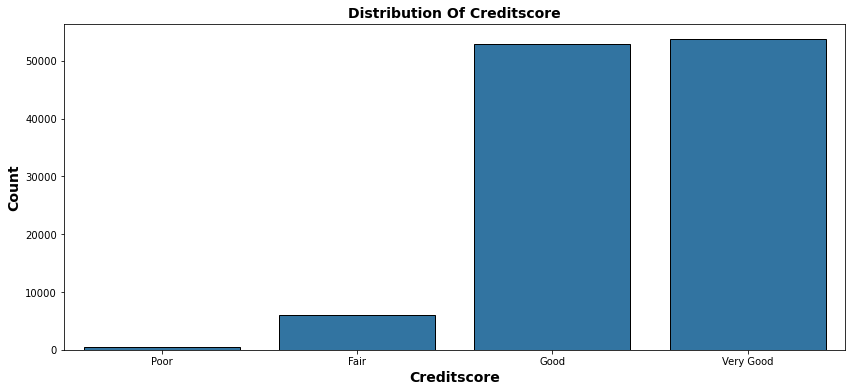

In [47]:
myCountplot(df_loan,'CreditScore')

From the plot majority of loans are performing very Good and Good while a very small numbure of loans perform pororrly and Fairly

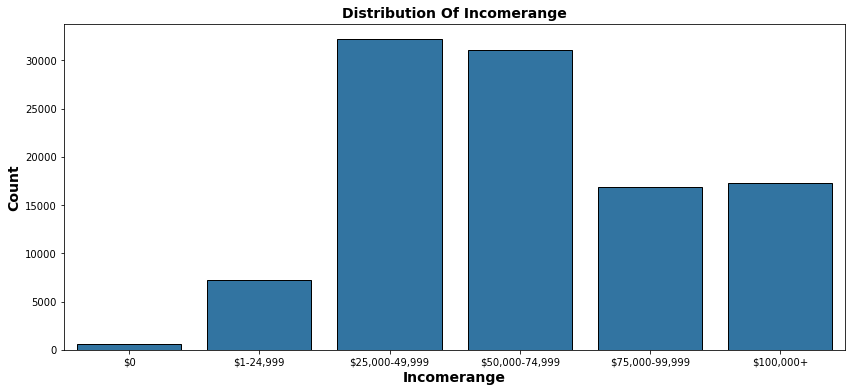

In [48]:
myCountplot(df_loan,'IncomeRange')

From IncomeRange loan anlaysis a number of loans borrowers falls between (25,000-49,999) followed  by  (50,000-74,999)

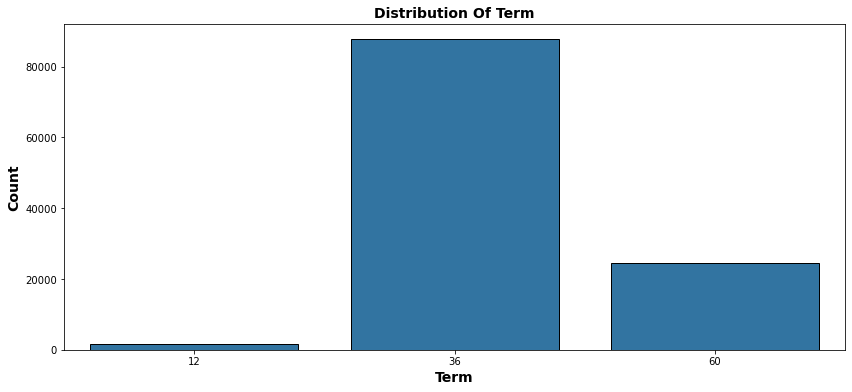

In [49]:
myCountplot(df_loan,'Term')

Majority of loan borrowers prefer loan payment of 36 months(3 years)

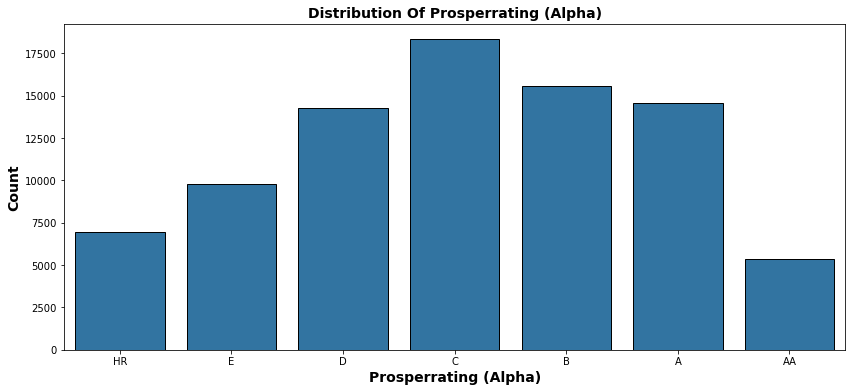

In [50]:
myCountplot(df_loan,'ProsperRating (Alpha)')

Most Borrowers are rated C

In [137]:
#create a new loan status
df_loan['LoanStatus_new']=df_loan['LoanStatus'].astype(str)

#Any with Past Due are put into one category
mask=df_loan['LoanStatus_new'].str.contains('Past Due')
df_loan.loc[mask,'LoanStatus_new']="Past Due"

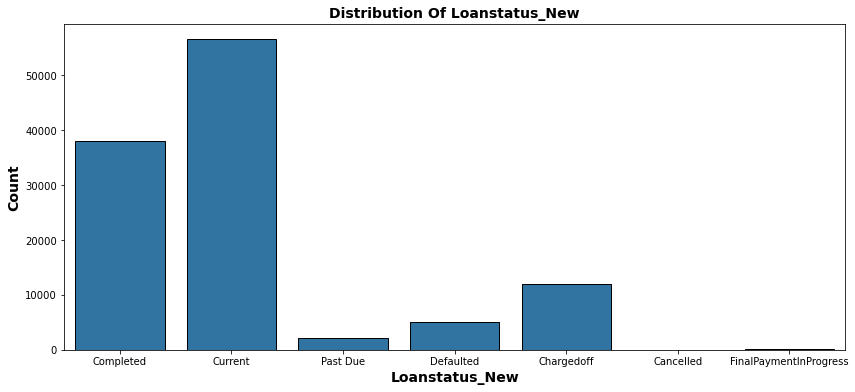

In [136]:
myCountplot(df_loan,'LoanStatus_new')


From the LoanStatus analysis we see a number of loans borrowers are  servicing,followed by fully serviced loans as completed with
chargeoff comming third

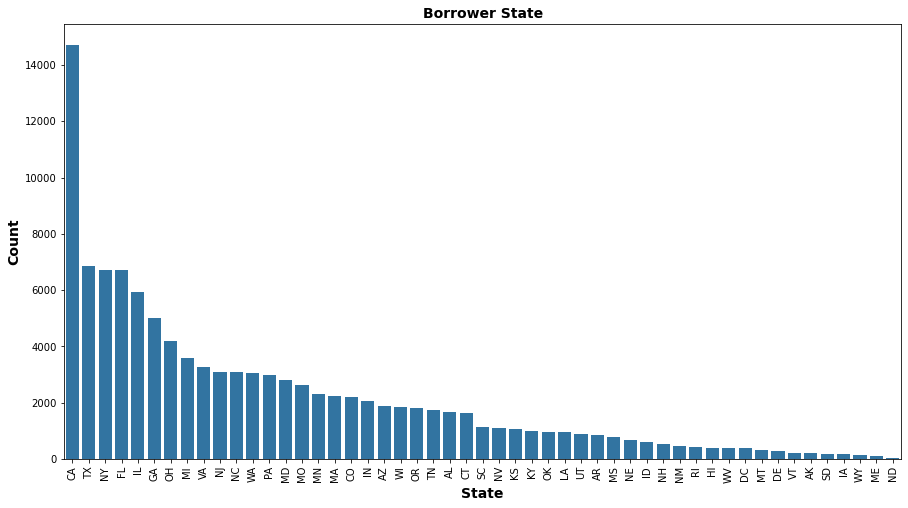

In [144]:
state_order=df_loan.BorrowerState.value_counts().index
plt.figure(figsize=[15,8])

#plotting
sb.countplot(data=df_loan,x='BorrowerState',color=base_color,order=state_order)

#Adding title and formatting
plt.title('Borrower State',fontsize=14,weight='bold')

#Adding axes labels and formating
plt.xlabel('State',fontsize=14,weight='bold')
plt.xticks(rotation=90);
plt.ylabel('Count',fontsize=14,weight='bold');

Califonia(CA) is the leading state,followed by Texas(TX) with Newyork(NY) and Florida(FL) closing on the top 4 biggest states
with loans

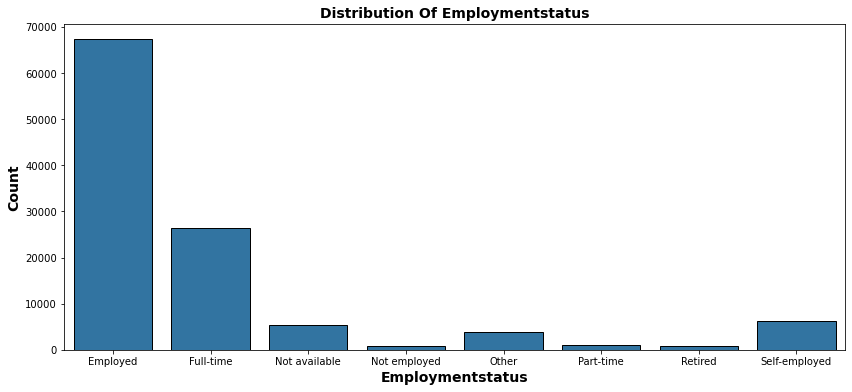

In [55]:
myCountplot(df_loan,'EmploymentStatus')

Employed person are the most loan borrowers with Full-time comming second

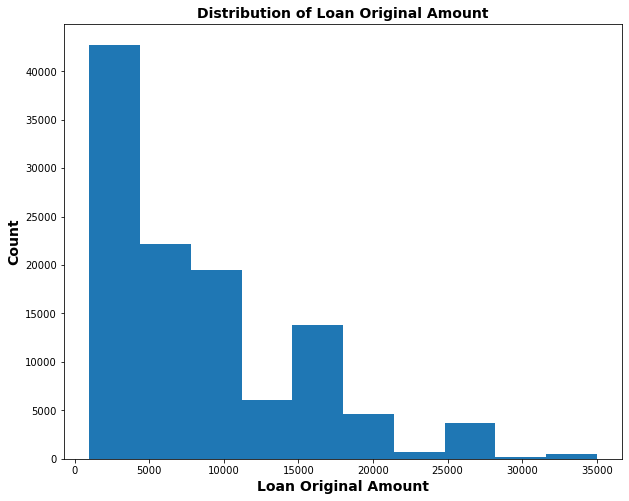

In [145]:
# Distribution of 9+Orig01inalLoan Amount
plt.figure(figsize=[10,8])
plt.hist(data=df_loan,x='LoanOriginalAmount');
plt.title('Distribution of Loan Original Amount',fontsize=14,weight='bold')
plt.xlabel('Loan Original Amount',fontsize=14,weight='bold');
plt.ylabel('Count',fontsize=14,weight='bold');

The distribution of LoanOriginalAmount looks right skewed .I will investigate more

<Figure size 1080x576 with 0 Axes>

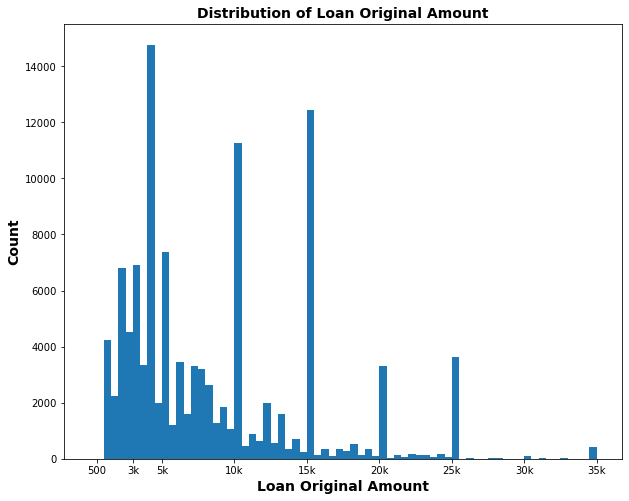

In [147]:
# Transformed distribution
plt.figure(figsize=[15,8])
binsize=500
bins=np.arange(0,df_loan['LoanOriginalAmount'].max()+binsize,binsize)
plt.figure(figsize=[10,8])
plt.hist(data=df_loan,x='LoanOriginalAmount',bins=bins);
plt.title('Distribution of Loan Original Amount',fontsize=14,weight='bold')
plt.xlabel('Loan Original Amount',fontsize=14,weight='bold');
plt.xticks([500,3000,5000,10000,15000,20000,25000,30000,35000],['500','3k','5k','10k','15k','20k','25k','30k','35k',]);
plt.ylabel('Count',fontsize=14,weight='bold');


From the transormed distribution,there are anumber of spikes around 4k,10k,15k,this is insighful

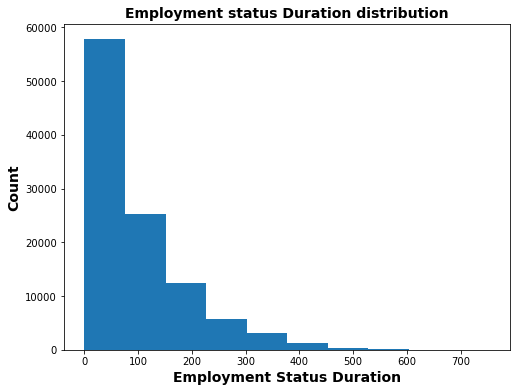

In [148]:
plt.figure(figsize=[8,6])
plt.hist(data=df_loan,x='EmploymentStatusDuration');
plt.title('Employment status Duration distribution',fontsize=14,weight='bold')
plt.xlabel('Employment Status Duration',fontsize=14,weight='bold');
plt.ylabel('Count',fontsize=14,weight='bold');

The distribution of employment status loan are right skewed

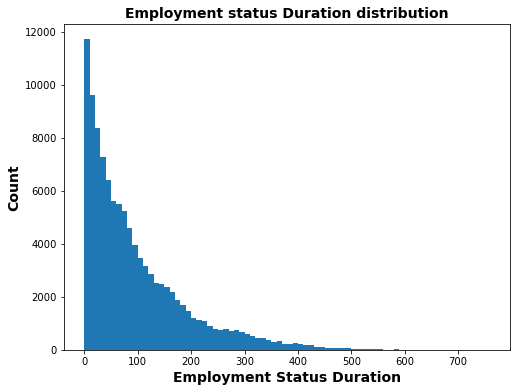

In [149]:

bins=np.arange(0,df_loan['EmploymentStatusDuration'].max()+10,10)
plt.figure(figsize=[8,6])
plt.hist(data=df_loan,x='EmploymentStatusDuration',bins=bins);
plt.title('Employment status Duration distribution',fontsize=14,weight='bold')
plt.xlabel('Employment Status Duration',fontsize=14,weight='bold');
plt.ylabel('Count',fontsize=14,weight='bold');

Even with transormation the distribution still has a rightwards tail

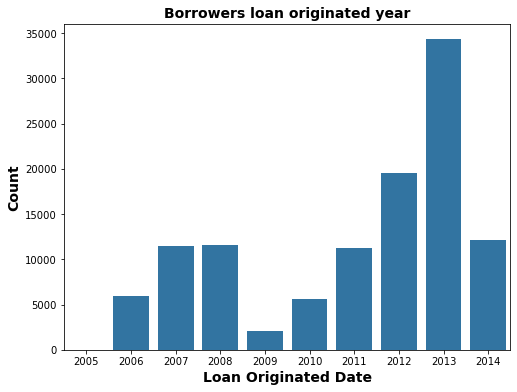

In [151]:
plt.figure(figsize=[8,6])
sb.countplot(data=df_loan,x=df_loan['LoanOriginationDate'].dt.year,color=base_color);
plt.title('Borrowers loan originated year',fontsize=14,weight='bold')
plt.xlabel('Loan Originated Date',fontsize=14,weight='bold');
plt.ylabel('Count',fontsize=14,weight='bold');

There was a lot loan uptake in 2009 and start rising steadily and peaked at the year 2013

# Bivariate Exploration

In [37]:
df_loan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113937 entries, 0 to 113936
Data columns (total 25 columns):
 #   Column                      Non-Null Count   Dtype         
---  ------                      --------------   -----         
 0   ListingKey                  113937 non-null  object        
 1   ListingCreationDate         113937 non-null  datetime64[ns]
 2   CreditScore                 113213 non-null  category      
 3   Term                        113937 non-null  int64         
 4   LoanStatus                  113937 non-null  category      
 5   ClosedDate                  55089 non-null   datetime64[ns]
 6   BorrowerAPR                 113912 non-null  float64       
 7   BorrowerRate                113937 non-null  float64       
 8   ProsperRating (numeric)     84853 non-null   float64       
 9   ProsperRating (Alpha)       84853 non-null   category      
 10  ProsperScore                84853 non-null   float64       
 11  ListingCategory (numeric)   113937 non-

In [92]:
numeric_vars=['BorrowerAPR','BorrowerRate','ProsperRating (numeric)','ProsperScore',
             'EmploymentStatusDuration','LoanOriginalAmount']
categoric_vars=['LoanStatus','ProsperRating(Alpha)','ListingCategory(numeric)','BorrowerState','Occupation',
                 'EmploymentStatus','IncomeRange']

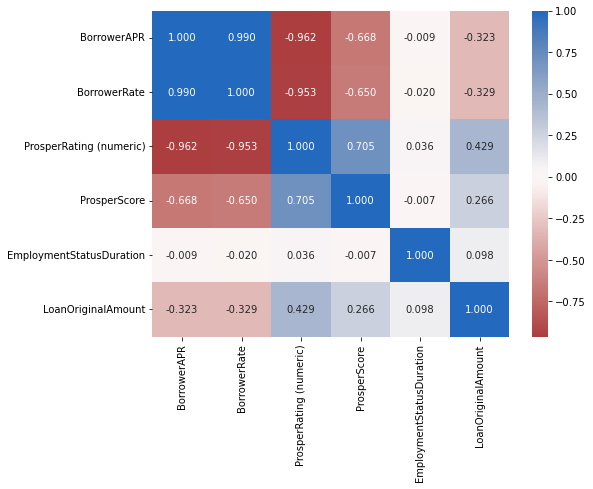

In [93]:
# correlation plot
plt.figure(figsize=[8,6])
sb.heatmap(df_loan[numeric_vars].corr(),annot=True,fmt= '.3f',
          cmap='vlag_r',center=0)
plt.show()

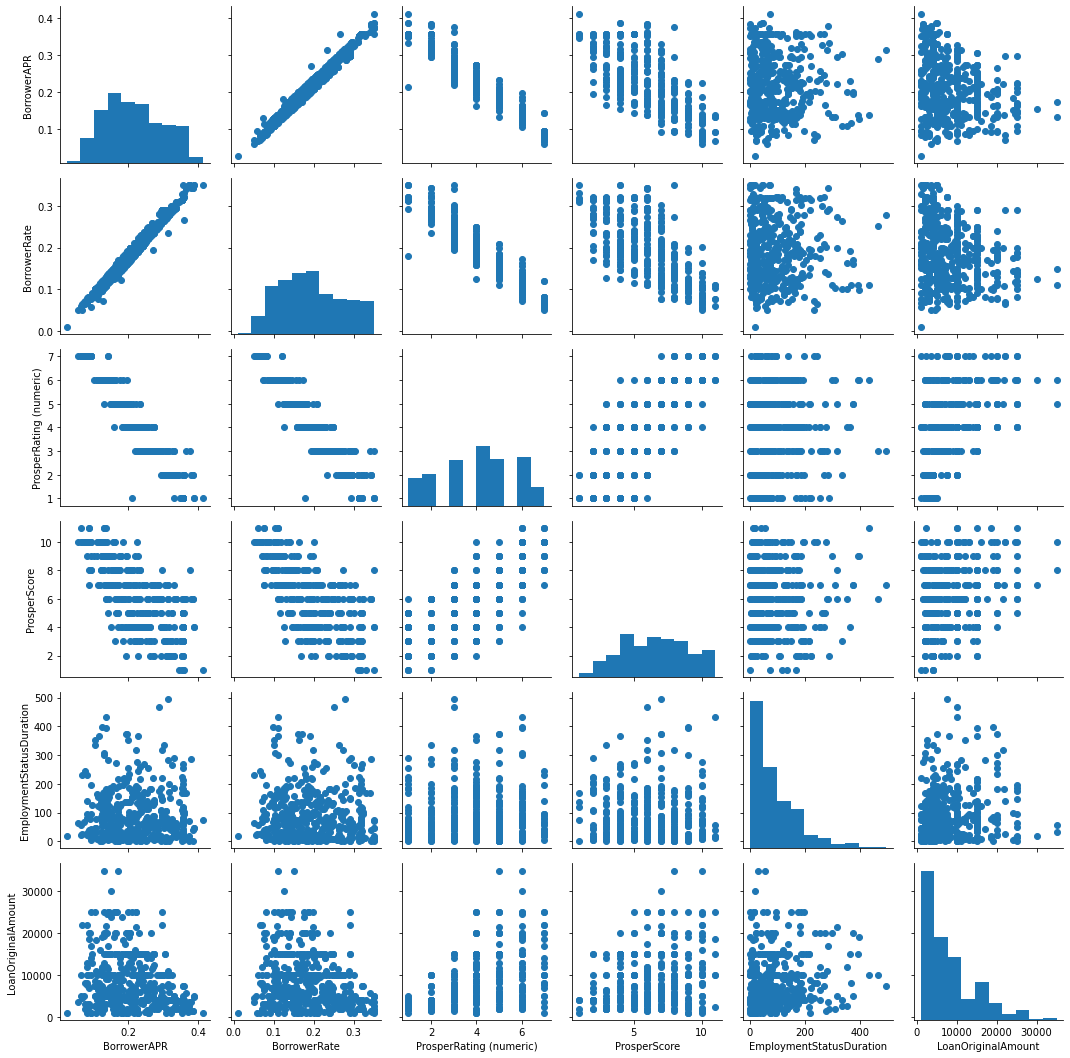

In [94]:
# use samples of 500 loans to get clearer distribution
samples=np.random.choice(df_loan.shape[0],500,replace=False)
df_loan_samples=df_loan.loc[samples,:]

g=sb.PairGrid(data=df_loan_samples,vars=numeric_vars)
g.map_diag(plt.hist)
g.map_offdiag(plt.scatter)

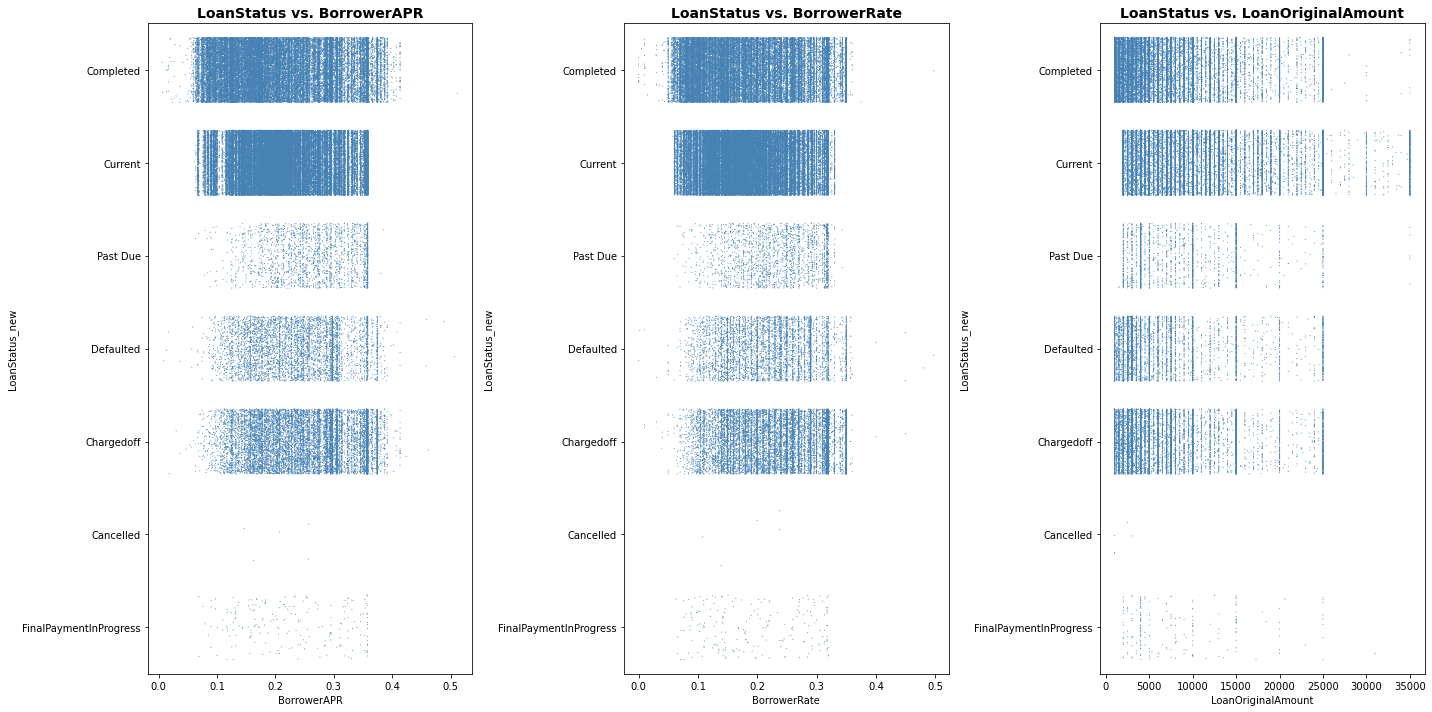

In [154]:
plot dimensionplt.figure(figsize=[20,10])

plt.subplot(1,3,1)
sb.stripplot(data=df_loan,orient='h',y='LoanStatus_new',x='BorrowerAPR',size=1,jitter=0.35,color='steelblue');
plt.title('LoanStatus vs. BorrowerAPR',fontsize=14,weight='bold');

plt.subplot(1,3,2)
sb.stripplot(data=df_loan,orient='h',y='LoanStatus_new',x='BorrowerRate',size=1,jitter=0.35,color='steelblue');
plt.title('LoanStatus vs. BorrowerRate',fontsize=14,weight='bold')

plt.subplot(1,3,3)
sb.stripplot(data=df_loan,orient='h',y='LoanStatus_new',x='LoanOriginalAmount',size=1,jitter=0.35,color='steelblue');
plt.title('LoanStatus vs. LoanOriginalAmount',fontsize=14,weight='bold')

plt.tight_layout()


From the LoanStatus vs Borrower past dues loans have higher Annual Rate

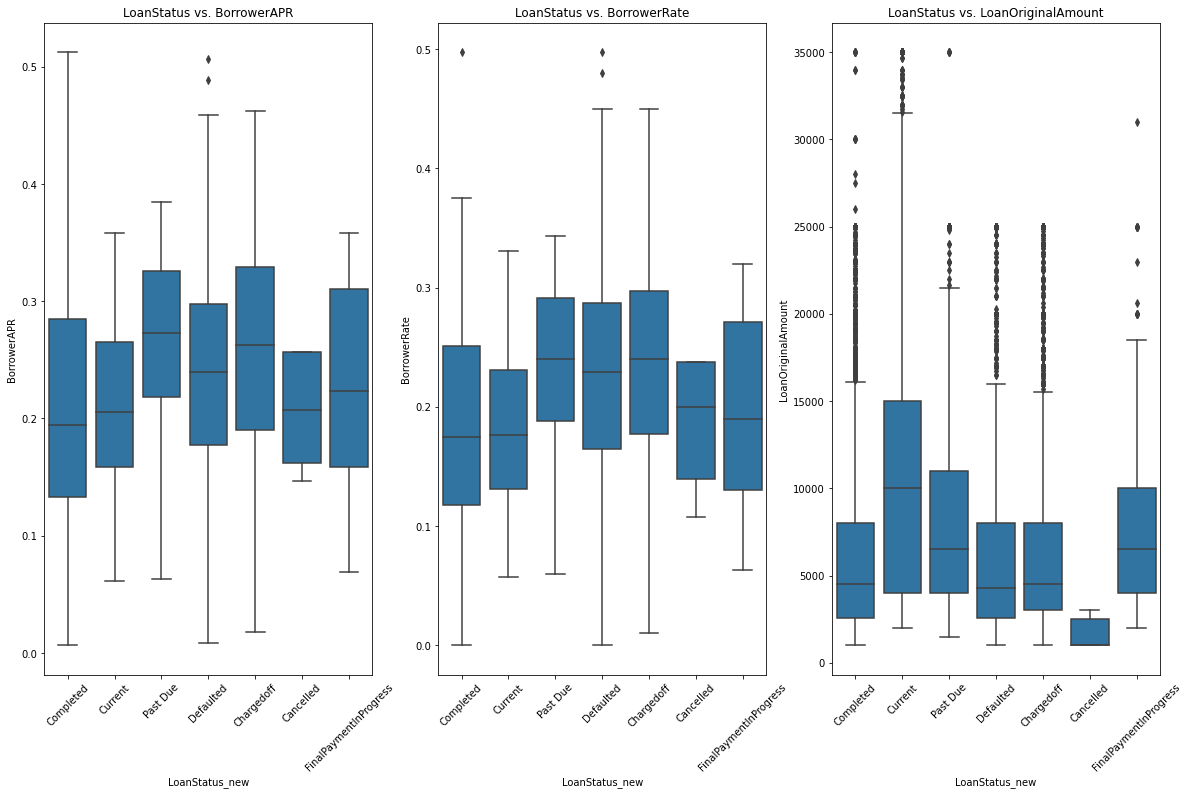

In [165]:
#plot dimension
plt.figure(figsize=[20,12])

base_color=sb.color_palette()[0]
plt.subplot(1,3,1)
sb.boxplot(data=df_loan,x='LoanStatus_new',y='BorrowerAPR',color=base_color);
plt.title('LoanStatus vs. BorrowerAPR')
plt.xticks(rotation=45);

plt.subplot(1,3,2)
sb.boxplot(data=df_loan,x='LoanStatus_new',y='BorrowerRate',color=base_color);
plt.title('LoanStatus vs. BorrowerRate')
plt.xticks(rotation=45);

plt.subplot(1,3,3)
sb.boxplot(data=df_loan,x='LoanStatus_new',y='LoanOriginalAmount',color=base_color);
plt.title('LoanStatus vs. LoanOriginalAmount')
plt.xticks(rotation=45);

From the LoanStatus vs Borrower past dues loans have higher Annual Rate

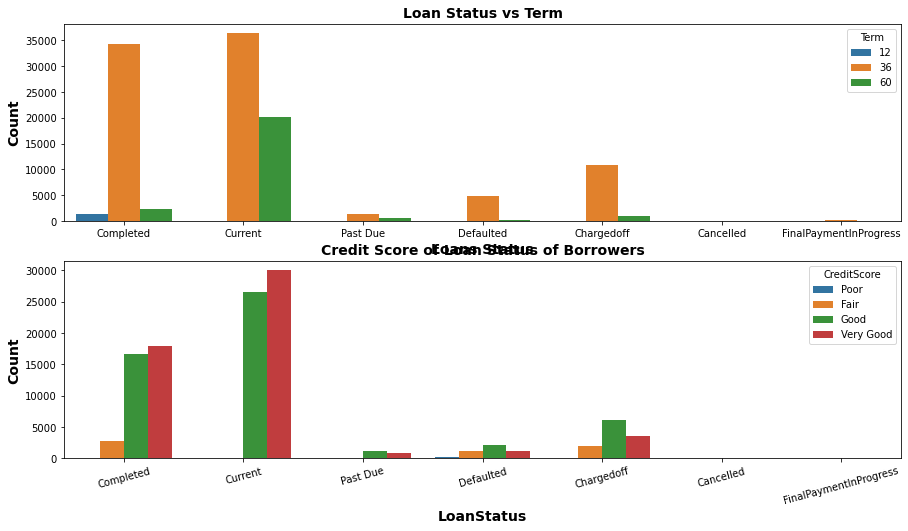

In [218]:
#plot dimension
plt.figure(figsize=[15,8])

plt.subplot(2,1,1)
#plot
sb.countplot(data=df_loan,x='LoanStatus_new',hue='Term');
#Add title and format
plt.title('Loan Status vs Term',fontsize=14,weight='bold')
#Add axes and format
plt.xlabel('Loans Status',fontsize=14,weight='bold')
plt.ylabel('Count',fontsize=14,weight='bold')
plt.legend(loc='upper right',title='Term');

plt.subplot(2,1,2)
#plot
sb.countplot(data=df_loan,x='LoanStatus_new',hue='CreditScore');
#Add title and format
plt.title('Credit Score of Loan Status of Borrowers',fontsize=14,weight='bold')
#Add axes and format
plt.xlabel('LoanStatus',fontsize=14,weight='bold')
plt.xticks(rotation=15);
plt.ylabel('Count',fontsize=14,weight='bold')
plt.legend(loc='upper right',title='CreditScore');




From the plot 36 months still the most prefered payment plan per the loan status from the three most LoanStatuses,Very good 
rating score tops the currentstatus followed by Good scores.The employed are the active and many borrowers with current loans
while full-time employees are many who have completed their loans.

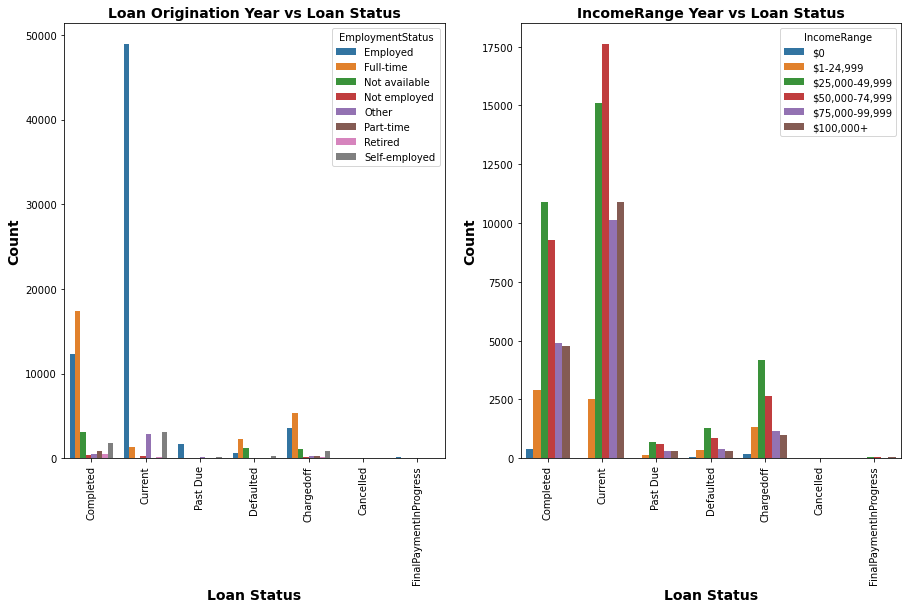

In [160]:
#plot dimension
plt.figure(figsize=[15,8])

plt.subplot(1,2,1)
#plot
sb.countplot(data=df_loan,x='LoanStatus_new',hue=df_loan['EmploymentStatus']);
#Add title and format
plt.title('Loan Origination Year vs Loan Status',fontsize=14,weight='bold')
#Add axes and format
plt.xlabel('Loan Status',fontsize=14,weight='bold')
plt.ylabel('Count',fontsize=14,weight='bold')
plt.xticks(rotation=90);
plt.legend(loc='upper right',title='EmploymentStatus');

plt.subplot(1,2,2)
#plot
sb.countplot(data=df_loan,x='LoanStatus_new',hue='IncomeRange')
#Add title and format
plt.title('IncomeRange Year vs Loan Status',fontsize=14,weight='bold')
#Add axes and format
plt.xlabel('Loan Status',fontsize=14,weight='bold')
plt.ylabel('Count',fontsize=14,weight='bold')
plt.xticks(rotation=90);
plt.legend(loc='upper right',title='IncomeRange');

Analysis from the IncomeRange shows a number of current loans are borrowers with income range of $ 50,000-74,999.
IncomeRange of 25,000-49,999 borrowers are majority who have cleared their loan


# Multivariate Exploration

In [123]:
df_loan['LoanOriginalAmount'].describe().to_frame().T

,count,mean,std,min,25%,50%,75%,max
LoanOriginalAmount,113937.0,8337.01385,6245.80058,1000.0,4000.0,6500.0,12000.0,35000.0


In [132]:
#create a new category Loan amount
df_loan['Loan_Amount']=((df_loan['LoanOriginalAmount']//5000)*5000).astype(int)

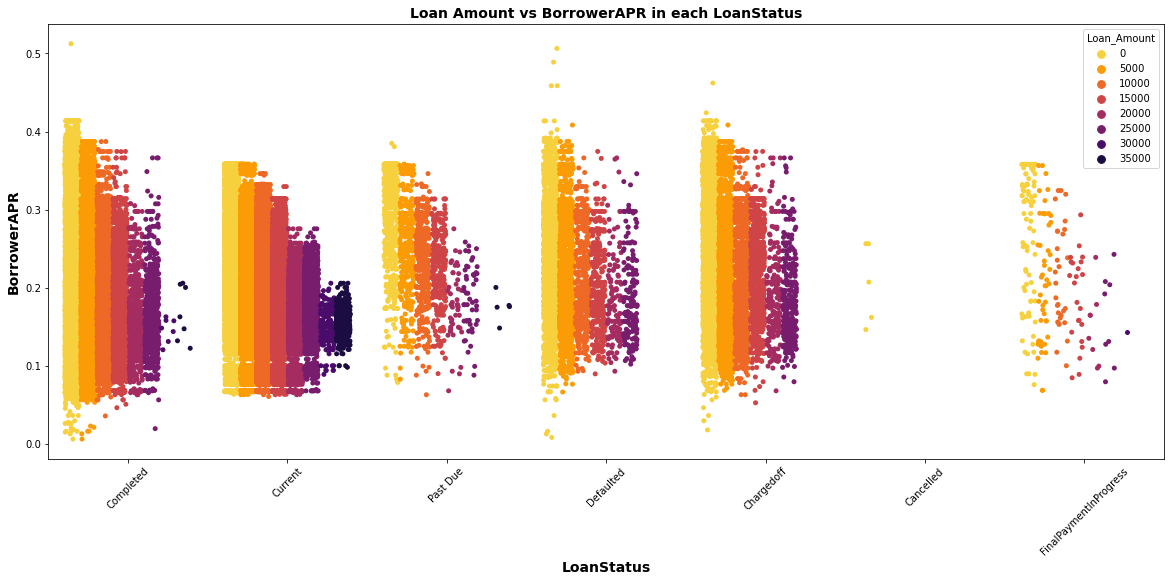

In [162]:
#LoanStatus vs BorrowerRate,Term

#set plot dimension
fig = plt.figure(figsize=[20,8])
#plot
sb.stripplot(data=df_loan,x='LoanStatus_new',y='BorrowerAPR',hue='Loan_Amount',
             jitter=0.35,palette='inferno_r',dodge=True);
#Add title and format  
plt.title('Loan Amount vs BorrowerAPR in each LoanStatus',fontsize=14,weight='bold')
#Add axes and format
plt.ylabel('BorrowerAPR',fontsize=14,weight='bold')
plt.xlabel('LoanStatus',fontsize=14,weight='bold')
plt.xticks(rotation=45);



we can see that as the a negative relationship in the current loan status loan amount increases  the Annual rate 
increases

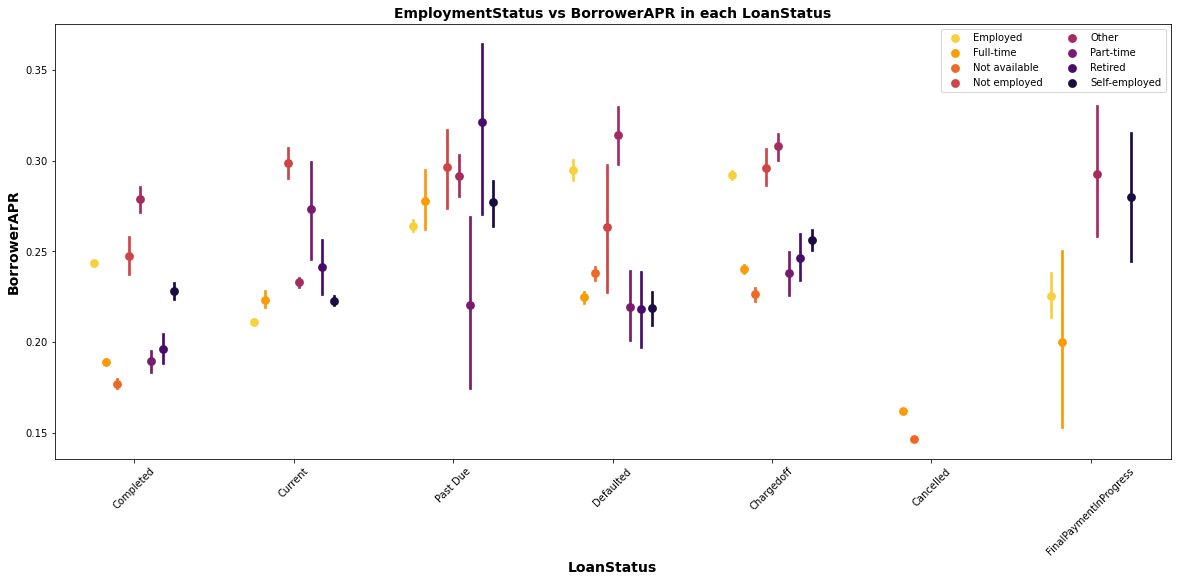

In [164]:
#plot the relationship between Loan Status ,Borrower APR and Employment Status
#set plot dimension
fig = plt.figure(figsize = [20,8])
#plot
ax = sb.pointplot(data = df_loan, x = 'LoanStatus_new', y = 'BorrowerAPR', hue = 'EmploymentStatus', linestyles = "",
                  dodge = 0.5, palette = 'inferno_r')
#Add title and format
plt.title('EmploymentStatus vs BorrowerAPR in each LoanStatus',fontsize=14,weight='bold')
#Add axes and format
plt.xlabel('LoanStatus',fontsize=14,weight='bold')
plt.ylabel('BorrowerAPR',fontsize=14,weight='bold')
plt.xticks(rotation=45)
plt.legend(ncol=2)
plt.show();

Past Due loans have higher Annual interest(BorrowerAPR) in all types of employment status

#### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest? 


Most of the loans have a repayment period 36 months(3 years).Loans with better creditscores have positive realtionship
as we see from current and completed loan status.BorrowerAPR has a positive impact on the loan status as those falls
within past dues tend to attract alot of annual rates,employment status is genereally dinamic as there is no direct 
relationships with loan status

In [ ]:
!jupyter nbconvert Prosper_Loan_Data_Part2.ipynb --to slides --post serve  --no-input --no-prompt